# Problem Statement

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import csv file
HR=pd.read_csv("E:\\Data Science\\Data Trained Evaluation Project\\WA_Fn-UseC_-HR-Employee-Attrition.csv",index_col=9)
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


Employee number is unique, total 1470 rows are there, so total employee are 1470, there fore it is set as index

In [3]:
HR.shape

(1470, 34)

Total rows in the dataset is 1470 and columns are 34

In [4]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

info() method is used to find dtype of columns and non null values in each columns, here we have total 8 object datatype columns and remaining columns have datatype integer

In [5]:
HR.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Describe method give stastical analysis of dataframe, it give analysis of numerical columns only, which include, total count, standard deviation, minimum and maximum value of each feature,as well as 25% ,50% and 75% represents first quartile,second quartile and third quartile of dataset

In [6]:
HR.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

isnull().sum() method give total null value count in each feature, we get no null value, this is good 

In [7]:
HR['Age'].value_counts()

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

The 'Age' feature gives the age group for employee in company,the age group is from 18 to 60

<AxesSubplot:xlabel='Age', ylabel='count'>

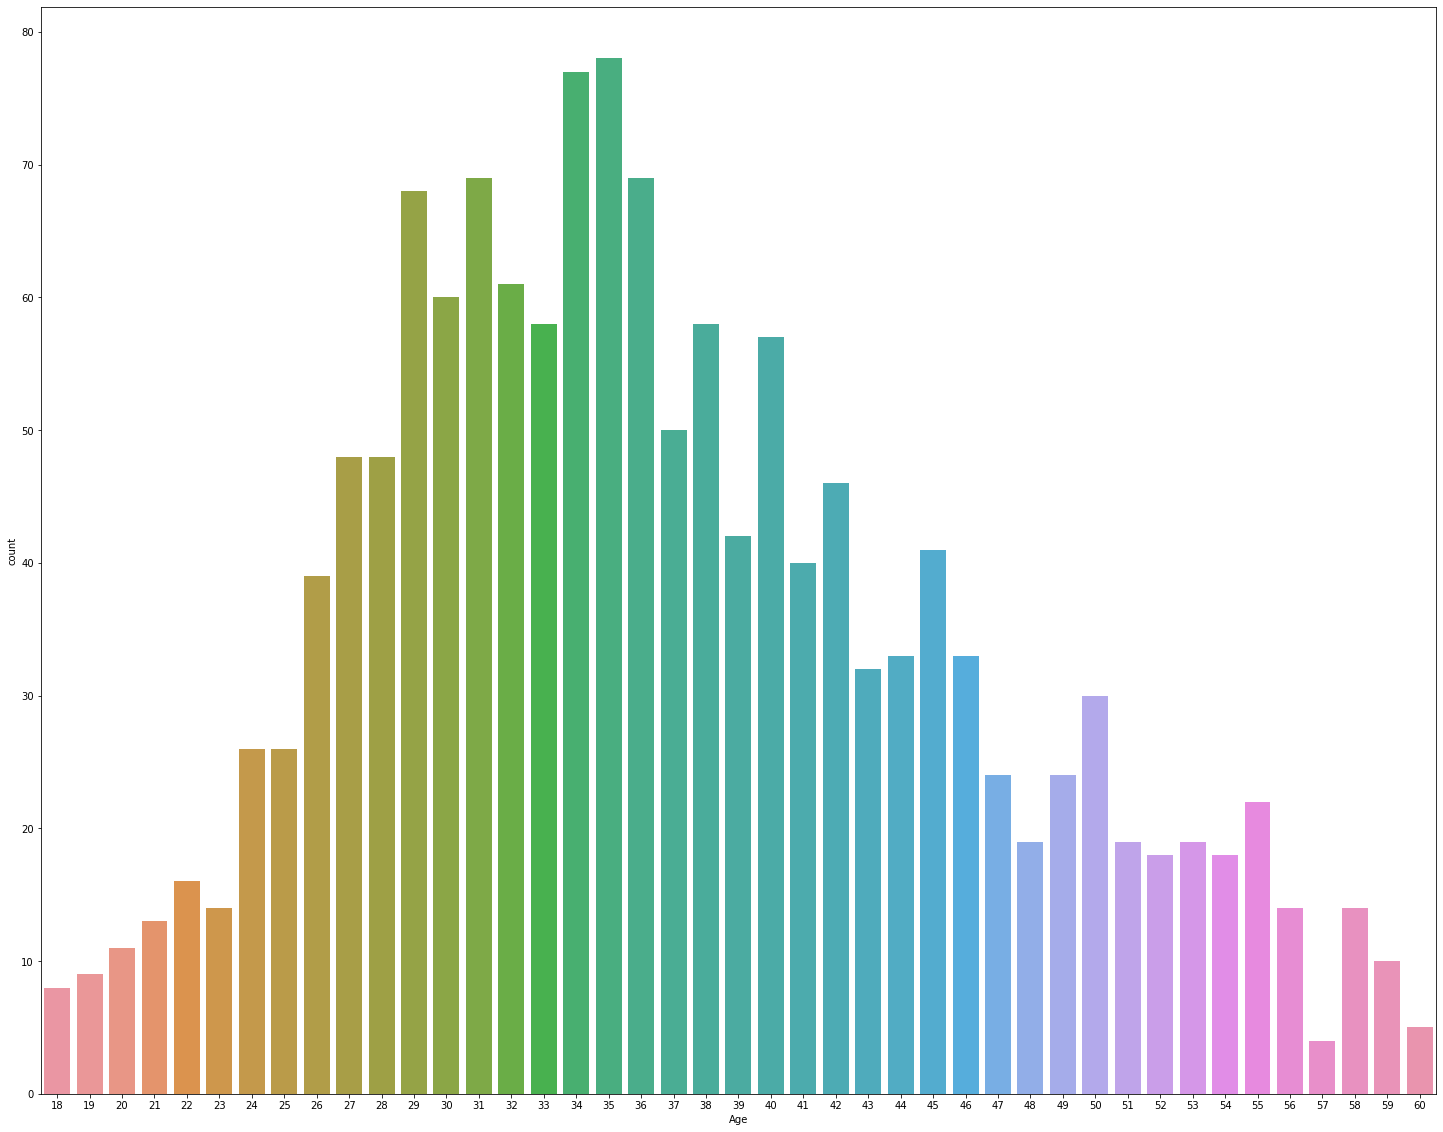

In [8]:
plt.figure(figsize=(25,20))
sns.countplot(HR['Age'])

count plot is plotted for age, which shows that,age group 29 to 37 has maximum employee in the company,as we proceed towards age group above 40, employee counts goes on decreasing 

In [9]:
HR['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

For attrition count 'No' is 1233 and "yes" is 237, which need to useimbalance techniques 

<AxesSubplot:xlabel='Attrition', ylabel='count'>

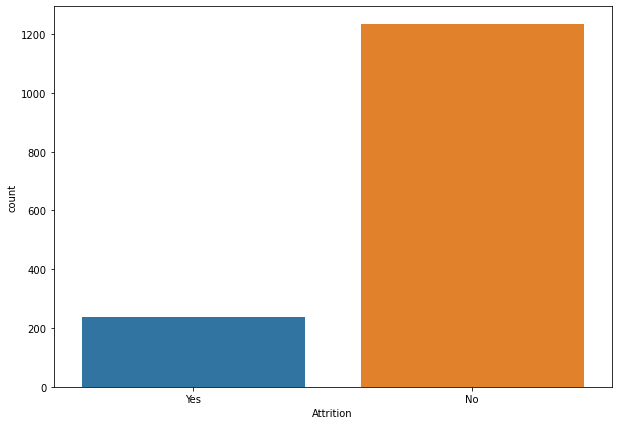

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(HR['Attrition'])

Here we plotted count plotfor "Attrition"

In [11]:
HR['Attrition']=HR['Attrition'].replace(['Yes','No'],[1,2])


Here we use encoding where yes is replaced by 1 and No is replaced by 2

In [12]:
HR['Attrition'].value_counts()

2    1233
1     237
Name: Attrition, dtype: int64

We get same count as above

In [13]:
HR['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

feature "BusinessTravel" has 3 class "Travel_rarely","Travel_Frequently" and 'Non-Travel'

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

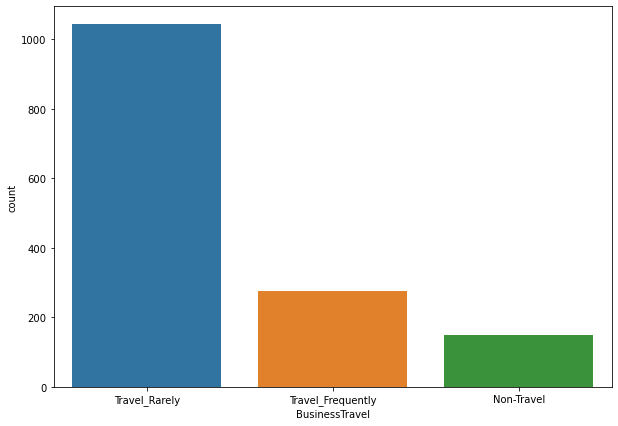

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(HR['BusinessTravel'])

In [15]:
HR['BusinessTravel']=HR['BusinessTravel'].replace(['Travel_Rarely','Travel_Frequently','Non-Travel'],[1,2,3])

Here we encoding where all three class are replaced by 1,2 and 3

In [16]:
HR['BusinessTravel'].value_counts()

1    1043
2     277
3     150
Name: BusinessTravel, dtype: int64

In [17]:
HR['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

HR department has 3 class,'Research & Development','Sales' and 'Human Resources' with there count is given

<AxesSubplot:xlabel='Department', ylabel='count'>

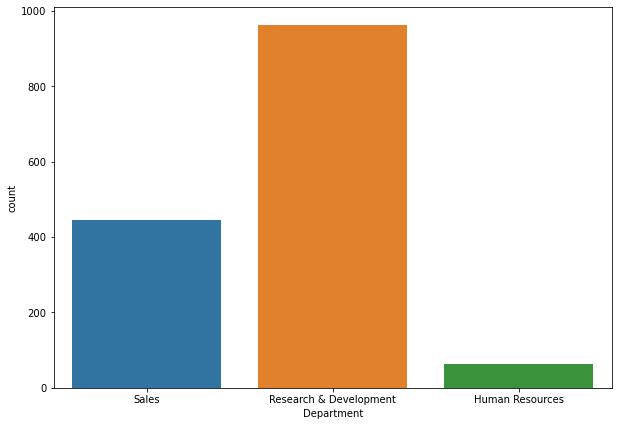

In [18]:

plt.figure(figsize=(10,7))
sns.countplot(HR['Department'])

In [19]:
HR['Department']=HR['Department'].replace(['Research & Development','Sales','Human Resources'],[1,2,3])

Here we replace 'Research & Development'by 1, 'Sales'by 2 and  'Human Resources'by 3

In [20]:
HR['Department'].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [21]:
HR['DailyRate'].value_counts()

691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64

In [22]:
HR['DistanceFromHome'].value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
12     20
17     20
13     19
22     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

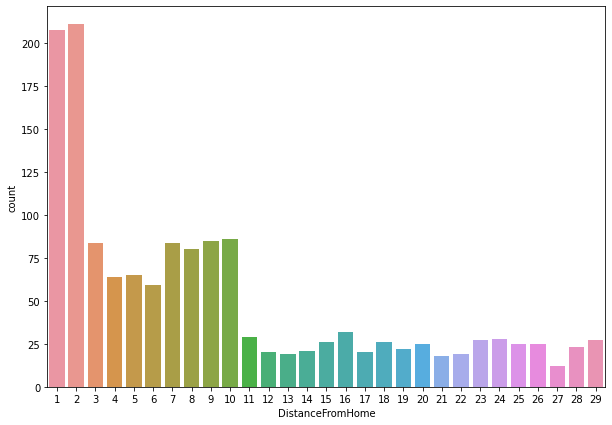

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(HR['DistanceFromHome'])

HR feature 'DistanceFromHome' has maximum count for class 1 and 2

In [24]:
HR['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

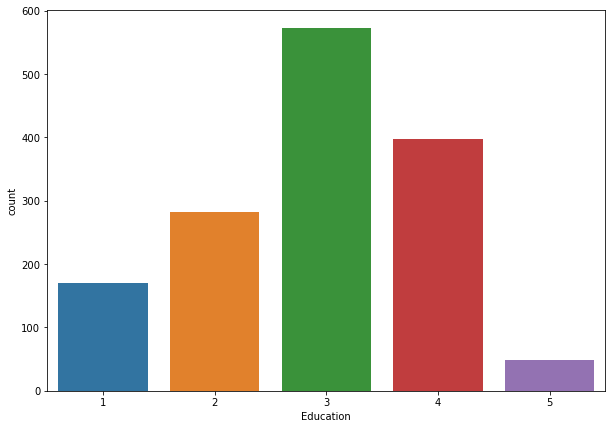

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(HR['Education'])

in HR dataset "Education" has total 5 class ,class 3 has maximum counts

In [26]:
HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [27]:
HR['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Educational field has total 5 classes "life sciences",'Medical','marketing','Technical Degree','Other' and 'Human Resources'

<AxesSubplot:xlabel='EducationField', ylabel='count'>

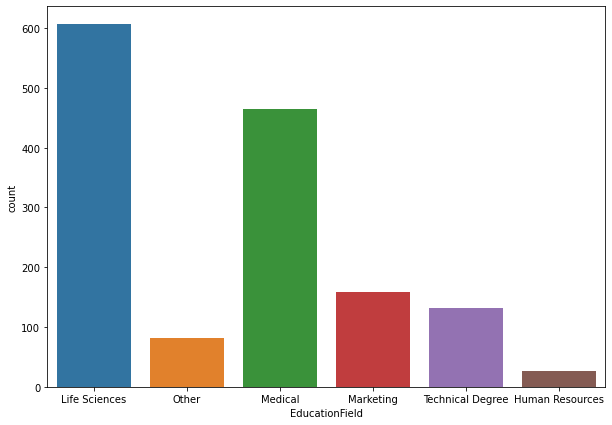

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(HR['EducationField'])

In [29]:
HR['EducationField']=HR['EducationField'].replace(['Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'],[1,2,3,4,5,6])

Here i used encoding,in which "Life Sciences" is replaced by 1,"Medical" is replaced by 2,"Technical Degree" is replaced by 3,"Marketing" is replaced by 4,"Other" is replaced by 5,"Human Resources" is replaced by 6,

In [30]:
HR['EducationField'].value_counts()

1    606
2    464
3    159
4    132
5     82
6     27
Name: EducationField, dtype: int64

In [31]:
HR['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [32]:
HR['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

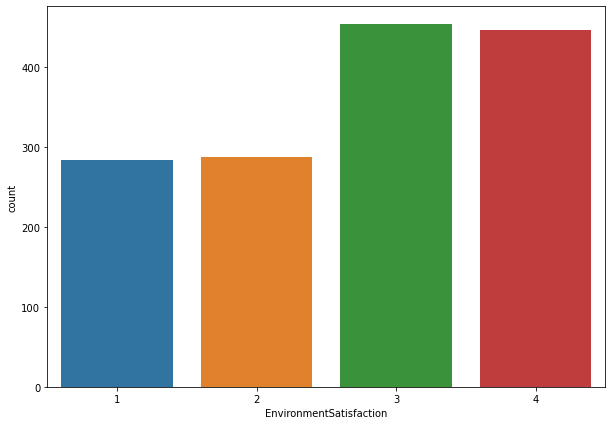

In [33]:
plt.figure(figsize=(10,7))
sns.countplot(HR['EnvironmentSatisfaction'])

In [34]:
HR['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [35]:
HR['Gender']=HR['Gender'].replace(['Male','Female'],[1,2])

In [36]:
HR['Gender'].value_counts()

1    882
2    588
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

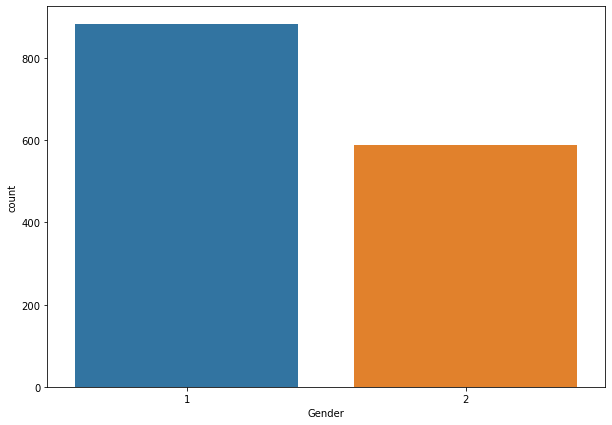

In [37]:
plt.figure(figsize=(10,7))
sns.countplot(HR['Gender'])

In [38]:
HR['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<AxesSubplot:xlabel='JobRole', ylabel='count'>

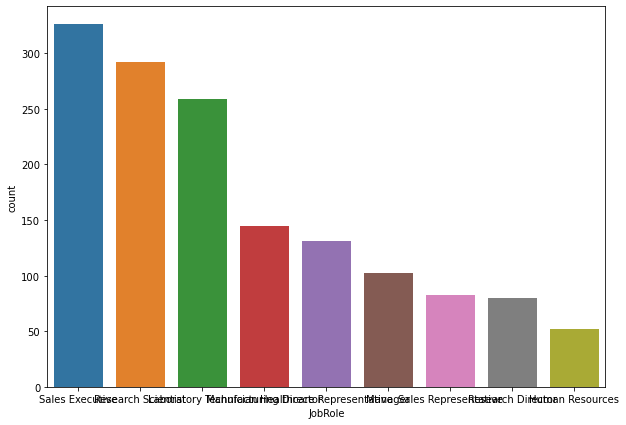

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(HR['JobRole'])

In [40]:
HR['JobRole']=HR['JobRole'].replace(['Sales Executive','Research Scientist','Laboratory Technician','Manufacturing Director',
 'Healthcare Representative','Manager','Sales Representative','Research Director','Human Resources'],[1,2,3,4,5,6,7,8,9])

here i replaced all job title wth numerical from 1 to 9

In [41]:
HR['JobRole'].value_counts()

1    326
2    292
3    259
4    145
5    131
6    102
7     83
8     80
9     52
Name: JobRole, dtype: int64

In [42]:
HR['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

Total 3 class for "MaritalStatus" ,single,Married and Divorced

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

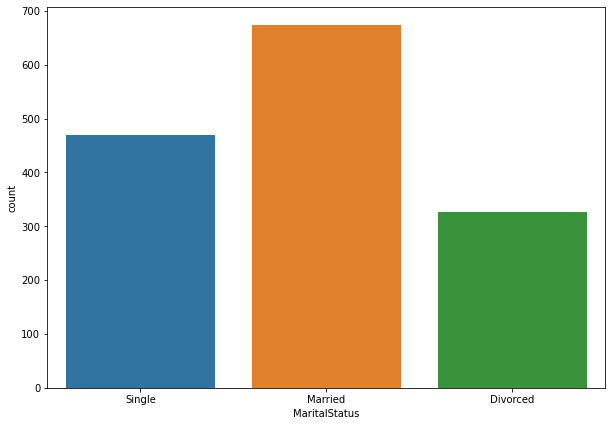

In [43]:
plt.figure(figsize=(10,7))
sns.countplot(HR['MaritalStatus'])

In [44]:
HR['MaritalStatus']=HR['MaritalStatus'].replace(['Married','Single','Divorced'],[1,2,3])


In [45]:
HR['MaritalStatus'].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [46]:
HR['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

here we can see that all employess are above 18

<AxesSubplot:xlabel='Over18', ylabel='count'>

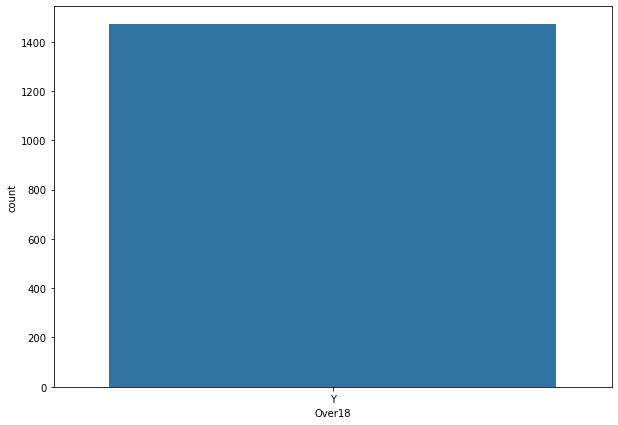

In [47]:
plt.figure(figsize=(10,7))
sns.countplot(HR['Over18'])

In [48]:
HR['Over18']=HR['Over18'].replace('Y',1)

In [49]:
HR['Over18'].value_counts()

1    1470
Name: Over18, dtype: int64

here i repaced Y by 1

In [50]:
HR['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

Total 1054 employee performed  no Overtime and 416 employee performed overtime

<AxesSubplot:xlabel='OverTime', ylabel='count'>

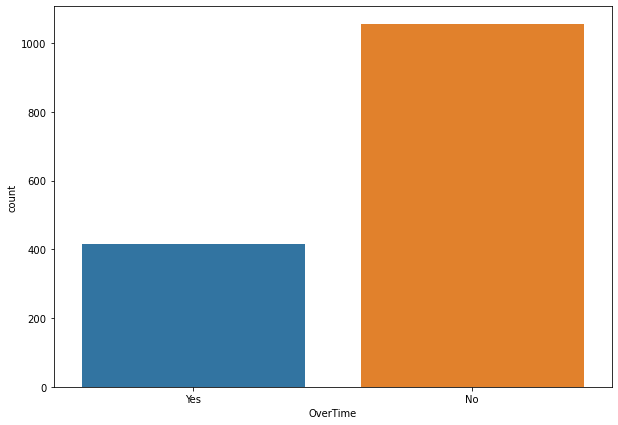

In [51]:
plt.figure(figsize=(10,7))
sns.countplot(HR['OverTime'])

In [52]:
HR['OverTime']=HR['OverTime'].replace(['No','Yes'],[1,2])

I replaced No by 1 and Yes by 2

In [53]:
HR['OverTime'].value_counts()

1    1054
2     416
Name: OverTime, dtype: int64

In [54]:
HR['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

for all employee 'StandardHours'are 80

In [55]:
HR['HourlyRate'].value_counts()

66    29
42    28
98    28
48    28
84    28
      ..
31    15
68    14
53    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64

Hourly rate for employee has different rate, total lenth of hour rate is 71

In [56]:
HR['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

total 3 classes in feature "StockOptionLevel"

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

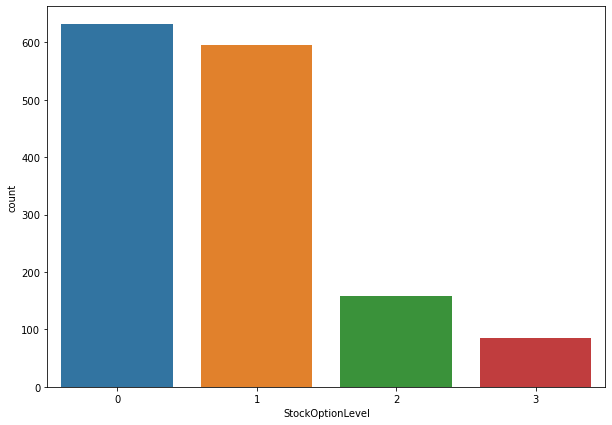

In [57]:
plt.figure(figsize=(10,7))
sns.countplot(HR['StockOptionLevel'])

In [58]:
HR['PercentSalaryHike'].value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

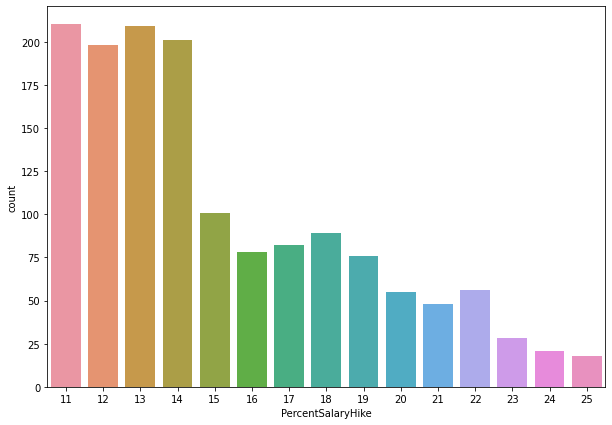

In [59]:
plt.figure(figsize=(10,7))
sns.countplot(HR['PercentSalaryHike'])

The most hike in salary is 11 to 14 percent, maximum hike is 25%

In [60]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int64
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

here we can see that all categorical text data is converted to Numerical data,with no null values

In [61]:
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,1,1102,2,1,2,1,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,2,2,279,1,8,1,1,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,1,1,1373,1,2,2,5,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,2,2,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,2,1,591,1,2,1,2,1,1,...,4,80,1,6,3,3,2,2,2,2


## Multivariate Analysis

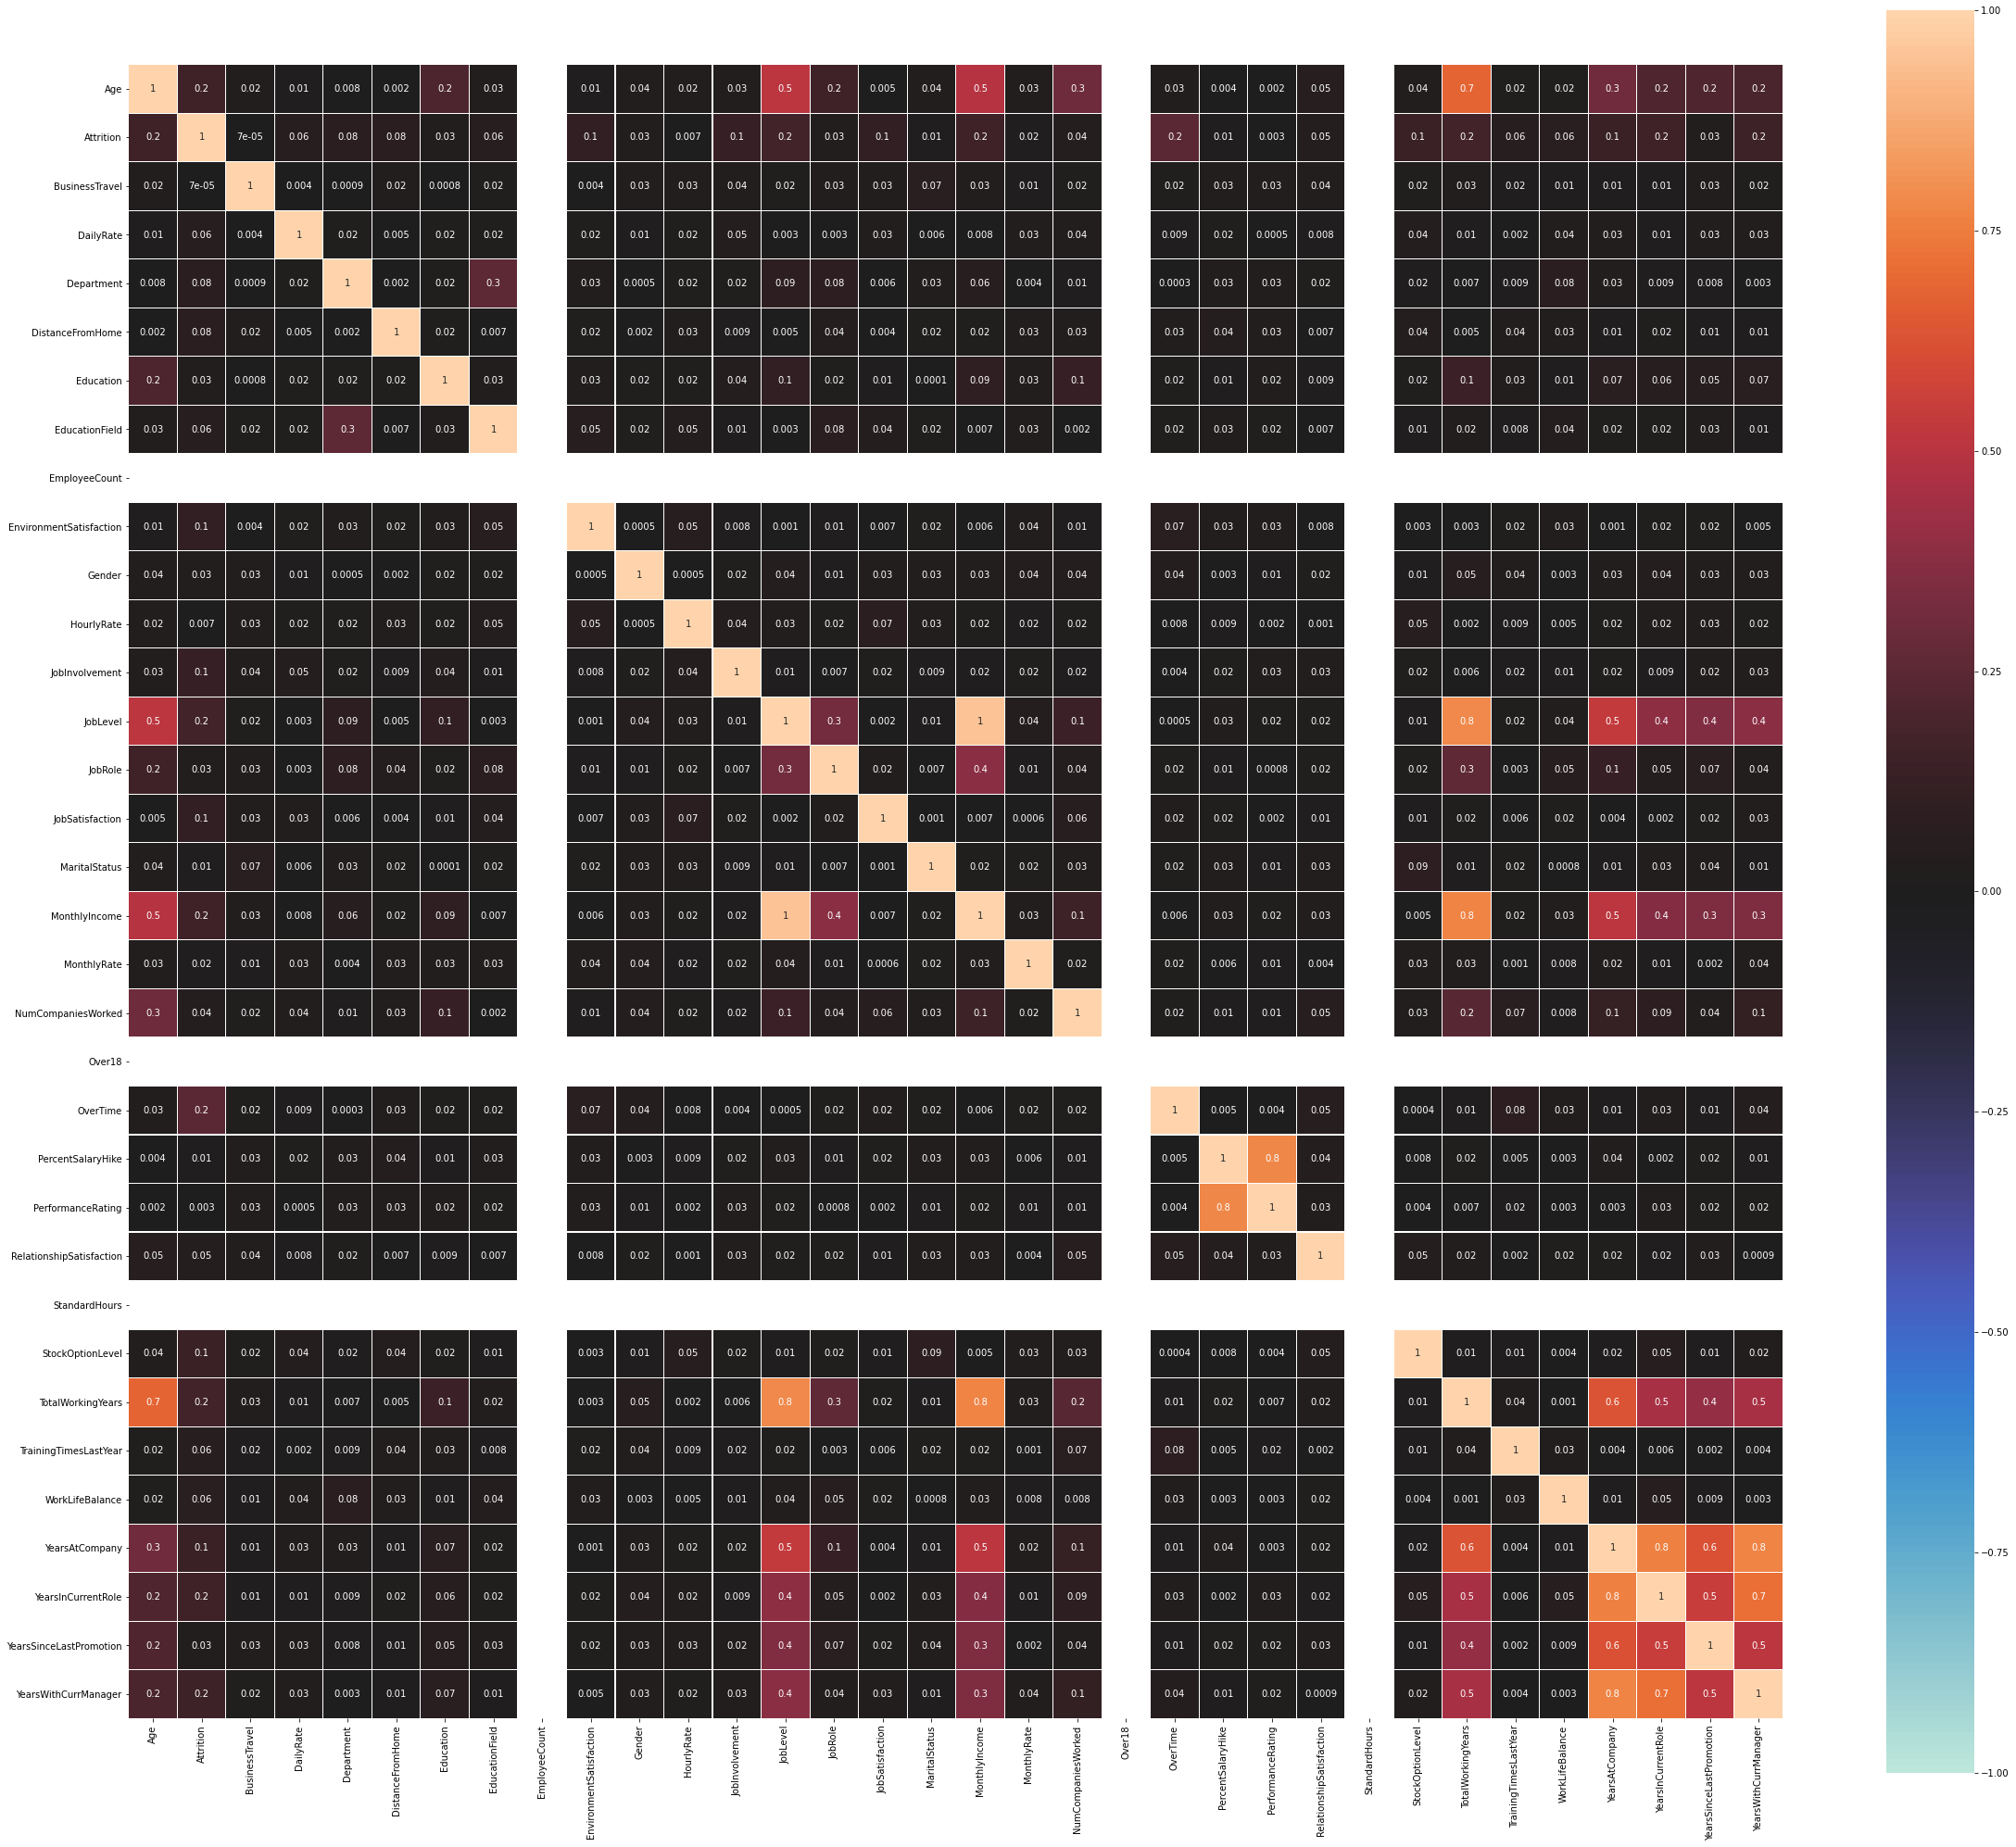

In [62]:
# lets plot heatmap which is multivaraiate analysis,find the coeffient of multicollinearity
df_corr=HR.corr().abs()
plt.figure(figsize=(40,35))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=.1)
plt.show()

In [63]:
corr_matrix=HR.corr()   # here we get values of correlation in descending order
corr_matrix['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
TotalWorkingYears           0.171063
JobLevel                    0.169105
YearsInCurrentRole          0.160545
MonthlyIncome               0.159840
Age                         0.159205
YearsWithCurrManager        0.156199
StockOptionLevel            0.137145
YearsAtCompany              0.134392
JobInvolvement              0.130016
JobSatisfaction             0.103481
EnvironmentSatisfaction     0.103369
WorkLifeBalance             0.063939
TrainingTimesLastYear       0.059478
DailyRate                   0.056652
RelationshipSatisfaction    0.045872
YearsSinceLastPromotion     0.033019
Education                   0.031373
Gender                      0.029453
JobRole                     0.027930
PercentSalaryHike           0.013478
HourlyRate                  0.006846
BusinessTravel              0.000074
PerformanceRating          -0.002889
MaritalStatus              -0.011195
MonthlyRate                -0.015170
NumCompaniesWorked         -0.043494
E

Heatmap is used to find correlation between independant variable and Target variable, value 1 indicate correlation of label verses label we can not compare correlation between categorical and continous data. the feature "EmployeeCount',Over18  & StandardHours has NaN value beacause its value is same for all rows

In [64]:
df_corr.skew()

Age                         2.201175
Attrition                   4.464995
BusinessTravel              5.513572
DailyRate                   5.505717
Department                  5.005448
DistanceFromHome            5.490026
Education                   4.985699
EducationField              5.092653
EmployeeCount                    NaN
EnvironmentSatisfaction     5.428931
Gender                      5.507108
HourlyRate                  5.491811
JobInvolvement              5.427748
JobLevel                    1.714208
JobRole                     3.865483
JobSatisfaction             5.428124
MaritalStatus               5.472857
MonthlyIncome               1.739730
MonthlyRate                 5.524521
NumCompaniesWorked          4.441924
Over18                           NaN
OverTime                    5.095200
PercentSalaryHike           3.822049
PerformanceRating           3.824584
RelationshipSatisfaction    5.495907
StandardHours                    NaN
StockOptionLevel            5.352515
T

In [65]:
HR=HR.drop(columns=['StandardHours','Over18','EmployeeCount'],axis=1)


Here i drop 'StandardHours','Over18','EmployeeCount' because it has same value for all rows,

## in the dataset column 'Attrition' is target variable, which consist of two values only 1 & 2, so our problem is Classification type

In [66]:
HR['Attrition'].value_counts()

2    1233
1     237
Name: Attrition, dtype: int64

our dataset target "Attrition" has two class "Yes" and "No" which is encoded as 1 and 2, by looking at dataset class count, we concluded that data imbalance is present,so we use SMOTE for oversampling and undersampling

In [67]:
HR['DailyRate'].value_counts()

691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64

In [68]:
pd.set_option('display.max_column',None)

In [69]:
HR.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1,1102,2,1,2,1,2,2,94,3,2,1,4,2,5993,19479,8,2,11,3,1,0,8,0,1,6,4,0,5
2,49,2,2,279,1,8,1,1,3,1,61,2,2,2,2,1,5130,24907,1,1,23,4,4,1,10,3,3,10,7,1,7
4,37,1,1,1373,1,2,2,5,4,1,92,2,1,3,3,2,2090,2396,6,2,15,3,2,0,7,3,3,0,0,0,0


In [70]:
HR['HourlyRate'].value_counts()

66    29
42    28
98    28
48    28
84    28
      ..
31    15
68    14
53    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64

In [71]:
HR.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

No null value is detected

In [72]:
#lets see some continous data

# Bivariate Analysis

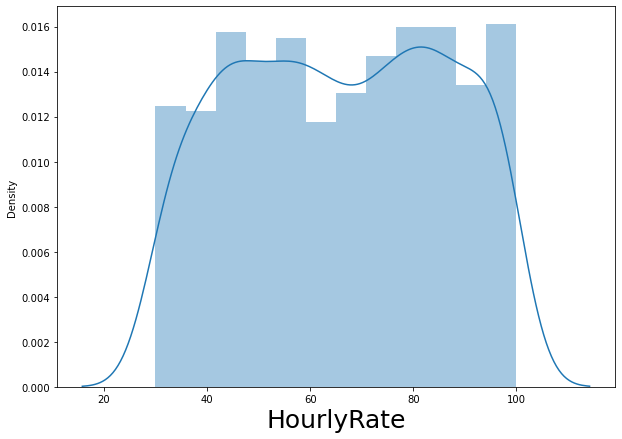

In [73]:
list=['HourlyRate','MonthlyIncome','MonthlyRate','DailyRate']
# now use distplot for all categorical feature
plt.figure(figsize=(10,7))
sns.distplot(HR['HourlyRate'])
plt.xlabel('HourlyRate',fontsize=25)
plt.show() 

the distribution of 'HourlyRate' is looks normal, no skewness is present in this feature,top portion is looks flat

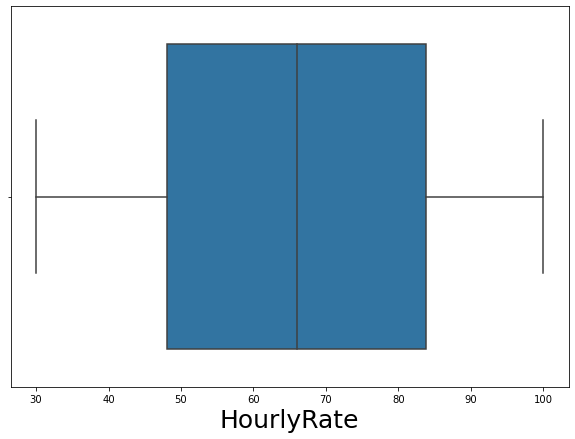

In [74]:
plt.figure(figsize=(10,7))
sns.boxplot(HR['HourlyRate'])
plt.xlabel('HourlyRate',fontsize=25)
plt.show()

The Boxplot for "HourlyRate" is displayed which shows that,no outlirs are present in the dataset,so it good for model building

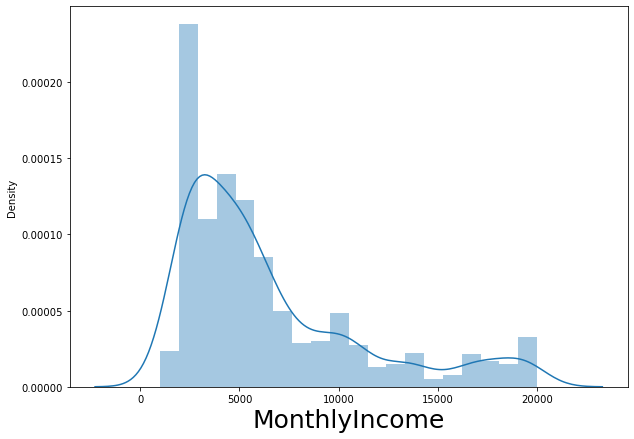

In [75]:
plt.figure(figsize=(10,7))
sns.distplot(HR['MonthlyIncome'])
plt.xlabel('MonthlyIncome',fontsize=25)
plt.show() 

The distribution curve for feature"Monthlyincome" look right skewed,which need more operation to remove skewness

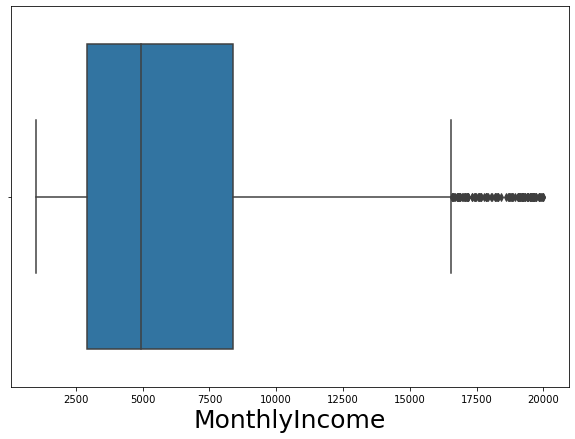

In [76]:
plt.figure(figsize=(10,7))
sns.boxplot(HR['MonthlyIncome'])
plt.xlabel('MonthlyIncome',fontsize=25)
plt.show() 

The boxplot for "MonthlyIncome" shows that Outliers are present in feature above Max value

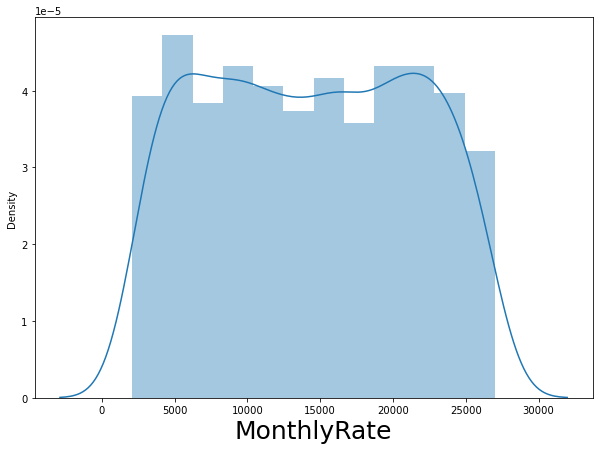

In [77]:
plt.figure(figsize=(10,7))
sns.distplot(HR['MonthlyRate'])
plt.xlabel('MonthlyRate',fontsize=25)
plt.show()

The Distribution curve for "Monthly Rate" is Normal, no skewness is observed on data

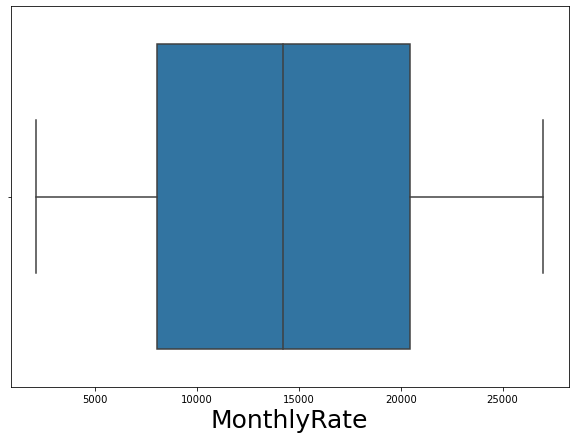

In [78]:
plt.figure(figsize=(10,7))
sns.boxplot(HR['MonthlyRate'])
plt.xlabel('MonthlyRate',fontsize=25)
plt.show()

No outliers are present in the boxplot of "MonthlyRate"

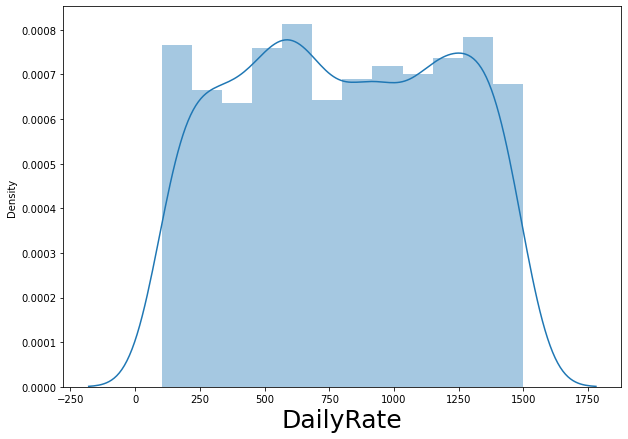

In [79]:
plt.figure(figsize=(10,7))
sns.distplot(HR['DailyRate'])
plt.xlabel('DailyRate',fontsize=25)
plt.show()

The Distplot for "DailyRate" look Normal , no skewness is present in plot

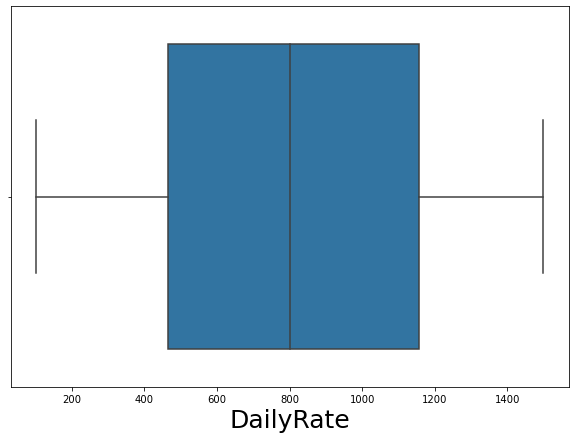

In [80]:
plt.figure(figsize=(10,7))
sns.boxplot(HR['DailyRate'])
plt.xlabel('DailyRate',fontsize=25)
plt.show()

The boxplot for "DailyRate" is displyed which shows no outliers present in the feature

In [81]:
HR.shape

(1470, 31)

In [82]:
# lets use z score to remove outliers
from scipy.stats import zscore # z score represent the number of  standard deviation with which value of observation differ than mean value
z=np.abs(zscore(HR['MonthlyIncome']))
HR['MonthlyIncome']=HR['MonthlyIncome'][(z<3)]  # z score with std deviation =3

Lets use Zscore method to remove outliers from feature "MonthlyIncome"

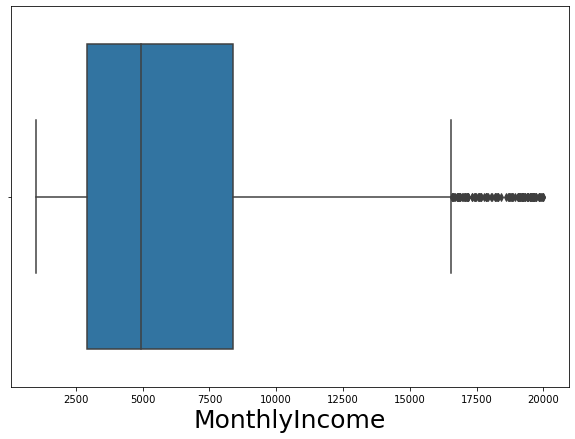

In [83]:
plt.figure(figsize=(10,7))
sns.boxplot(HR['MonthlyIncome'])
plt.xlabel('MonthlyIncome',fontsize=25)
plt.show() 

Still outlier present in the data so  now we use IQR method to reduce further


In [84]:
#find the IQR(Inter Quartile Range) to identify outliers
# 1st Quartile
q1=HR['MonthlyIncome'].quantile(0.25)
# 3 rd Quartile
q3=HR['MonthlyIncome'].quantile(0.75)
iqr=q3-q1
#Outlier detection formula
higher=q3+(1.5*iqr)  # uppar bound
lower=q1-(1.5*iqr)  # lower bound

In [85]:
#HR = HR[~((HR < (lower)) |(HR > (higher))).any(axis=1)]

In [86]:
HR[HR['MonthlyIncome'] > higher]
HR[HR['MonthlyIncome'] < lower]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [87]:
HR = HR[HR['MonthlyIncome'] < higher]

In [88]:
HR.shape

(1356, 31)

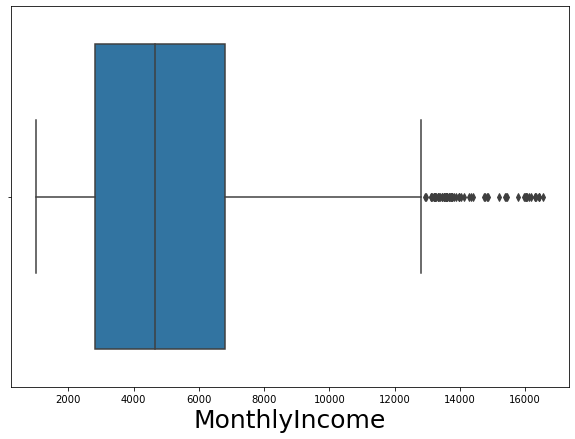

In [89]:
plt.figure(figsize=(10,7))
sns.boxplot(HR['MonthlyIncome'])
plt.xlabel('MonthlyIncome',fontsize=25)
plt.show() 

In [90]:
HR.shape

(1356, 31)

After removing some outlier ,Our data shape is 1356 rows with 31 columns

In [91]:
1356/1470

0.9224489795918367

we lost almost 8 percent data,this is enough no further reduction in dataset

In [92]:
HR.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

here i checked again the any Nan Value is created or Not, so no null value is created.

Now apply skewness removal method on feature "MonthlyIncome"  here i applied log1 tranformation,

In [93]:
HR['MonthlyIncome']=np.log1p(HR['MonthlyIncome'])

Here i applied np log1 skewness removal method on feature "'MonthlyIncome'"

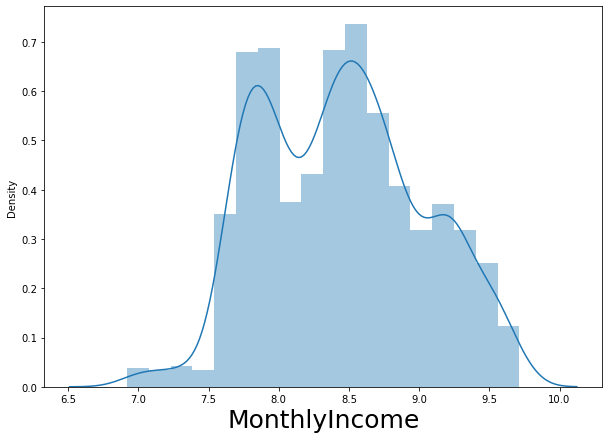

In [94]:
plt.figure(figsize=(10,7))
sns.distplot(HR['MonthlyIncome'])
plt.xlabel('MonthlyIncome',fontsize=25)
plt.show() 

Here we achive some Normal distribution not 100 percent,but better than previous one

In [95]:
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1,1102,2,1,2,1,2,2,94,3,2,1,4,2,8.698514,19479,8,2,11,3,1,0,8,0,1,6,4,0,5
2,49,2,2,279,1,8,1,1,3,1,61,2,2,2,2,1,8.543056,24907,1,1,23,4,4,1,10,3,3,10,7,1,7
4,37,1,1,1373,1,2,2,5,4,1,92,2,1,3,3,2,7.645398,2396,6,2,15,3,2,0,7,3,3,0,0,0,0
5,33,2,2,1392,1,3,4,1,4,2,56,3,1,2,3,1,7.975908,23159,1,2,11,3,3,0,8,3,3,8,7,3,0
7,27,2,1,591,1,2,1,2,1,1,40,3,1,3,2,1,8.151622,16632,9,1,12,3,4,1,6,3,3,2,2,2,2


In [96]:
HR.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

no null value is created

In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
HR[list]=scaler.fit_transform(HR[list])

MinMax scaler convert all values in the range from 0 to 1 only, In the list we pass only continous features,No scaling is applied on Categorical featues

In [98]:
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1,0.715820,2,1,2,1,2,2,0.914286,3,2,1,4,2,0.636731,0.698053,8,2,11,3,1,0,8,0,1,6,4,0,5
2,49,2,2,0.126700,1,8,1,1,3,1,0.442857,2,2,2,2,1,0.581147,0.916001,1,1,23,4,4,1,10,3,3,10,7,1,7
4,37,1,1,0.909807,1,2,2,5,4,1,0.885714,2,1,3,3,2,0.260188,0.012126,6,2,15,3,2,0,7,3,3,0,0,0,0
5,33,2,2,0.923407,1,3,4,1,4,2,0.371429,3,1,2,3,1,0.378362,0.845814,1,2,11,3,3,0,8,3,3,8,7,3,0
7,27,2,1,0.350036,1,2,1,2,1,1,0.142857,3,1,3,2,1,0.441189,0.583738,9,1,12,3,4,1,6,3,3,2,2,2,2


In [99]:
x=HR.drop(columns=['Attrition'],axis=1)
y=HR['Attrition']

Here i separated Label "Attrition" from all features, X contains all features only and Y has only label "Attrition"

SMOTE perform oversampling all class to have same number of count as the class with most number of counts

In [100]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)
y.value_counts()

1    1124
2    1124
Name: Attrition, dtype: int64

SMOTE is synthetic minority oversampling Technique used to solve the problem of imbalancing.It randomly increases nminority class by replicating them and balances class distribution

Near Miss is a undersampling Technique,instead of resampling,it will make majority class equals to minority class.to prevent information loss, we use Near Miss algorithm,lets check output y, all class in the output has same count or frequency,so we achive data balancing

In [101]:
#code for Undersampling
from imblearn.under_sampling import NearMiss
NR=NearMiss()
x,y=NR.fit_resample(x,y)

In [102]:
y.value_counts()

1    1124
2    1124
Name: Attrition, dtype: int64

now we get same count

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

Train test split is used to evaluate the performance of algorithm when we have large data,It divide the data into two set,training and testing phase, training data is used for fitting machine learning model and testing data is used for evaluating model performance

In [104]:
# finding best random state
from sklearn.tree import DecisionTreeClassifier
maxAccu=0  # initially max accuracy is set to 0
MaxRs=0  # initially Random state is set to 0
for i in range(1,200): # in for loop we pass 1 to 200 number out of which random state is selected
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i) # used train_test_split in for loop
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)  # fit training data of feature and label to model decision tree
    pred=mod.predict(x_test) # predict label by using test features
    acc=accuracy_score(y_test,pred) # genrate accuracy score by comparing test label and predicted label
    if acc> maxAccu:
        maxAccu=acc # assign accuracy score to max accuracy
        MaxRs=i  # the number at which we get maxaccuracy is treated as random state
print('Best Accuracy is',maxAccu,"on Random state",MaxRs)

Best Accuracy is 0.8487544483985765 on Random state 117


Whatever number we get as a random state is used by train test split in below code

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=MaxRs)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [107]:
Log_reg=LogisticRegression()
Log_reg.fit(x_train,y_train)
Log_reg_pred=Log_reg.predict(x_test)
Log_reg_accuracy=accuracy_score(y_test,Log_reg_pred)
print('Log_reg_accuracy',Log_reg_accuracy)

Log_reg_accuracy 0.8256227758007118


Logistics Regression is a algorithm used to predict data value by analysing one or more the independant features or variables

In [108]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)# fit training data to classifier
DTC_pred=DTC.predict(x_test)# predict output according test data
DTC_accuracy=accuracy_score(y_test,DTC_pred) #here we compared y_test with predicted output
print('DTC_accuracy',DTC_accuracy)

DTC_accuracy 0.8220640569395018


Decision Tree builds model in the form of tree structure,it divide the dataset into smaller and smaller subset, we determine the root node,then split the subsets,repeat the process till all instance have same class

In [109]:
KNC=KNeighborsClassifier()
KNC.fit(x_train,y_train)# fit training data to classifier
KNC_pred=KNC.predict(x_test)# predict output according test data
KNC_accuracy=accuracy_score(y_test,KNC_pred) #here we compared y_test with predicted output
print('KNC_accuracy',KNC_accuracy)

KNC_accuracy 0.8042704626334519


KNN store all cases and classify new model based on distance(Euclidean method),classification done by majority of votes neighbors

In [110]:
svc=SVC()
svc.fit(x_train,y_train)# fit training data to classifier
svc_pred=svc.predict(x_test) #predict output according test data
svc_accuracy=accuracy_score(y_test,svc_pred) #here we compared y_test with predicted output
print('svc_accuracy',svc_accuracy)

svc_accuracy 0.8202846975088968


SVC is effective when number of dimensions are greater than number of samples,it uses subset of training points(support vector) and hyperplane to give classification output

In [111]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)# fit training data to classifier
RFC_pred=RFC.predict(x_test) #predict label according test feature
RFC_accuracy=accuracy_score(y_test,RFC_pred)#here we compared test label with predicted label
print('RFC_accuracy',RFC_accuracy)

RFC_accuracy 0.9074733096085409


RFC is ensemble algorithm which combines more than one algorithm of same or different kind.Random Forest gives outcome based on predictions of number of models by taking mean of output from various trees

In [112]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)# fit training data to classifier
GBC_pred=GBC.predict(x_test) #predict label according test feature
GBC_accuracy=accuracy_score(y_test,GBC_pred)#here we compared test label with predicted label
print('GBC_accuracy',GBC_accuracy)

GBC_accuracy 0.8825622775800712


Gradient boosting is ensemble algorithm it involves building a strong model by using collection of weaker models.It combine many weak models and make strong predictive model

In [113]:
XBC=XGBClassifier(eval_metric='mlogloss')
XBC.fit(x_train,y_train)# fit training data to classifier
XBC_pred=XBC.predict(x_test) #predict label according test feature
XBC_accuracy=accuracy_score(y_test,XBC_pred)#here we compared test label with predicted label
print('XBC_accuracy',XBC_accuracy)

XBC_accuracy 0.9181494661921709


In [114]:
from sklearn.model_selection import cross_val_score

CV is a technique used to check whether model is overfitted or not, if model accuracy is high, then there is chances of model is overfitted.We use CV score for every model,for this we require model,features and labels, cv is cross validation spliting strategy.finally it take mean of all iteration and return cv score

In [115]:
Log_reg_cv_score=cross_val_score(Log_reg,x,y,cv=5).mean() # we pass Logistic regression model,feature,target and cv=5 means 4 set for training and 1 for testing
Log_reg_cv_score

0.8038822073744123

In [116]:
DTC_CV_score=cross_val_score(DTC,x,y,cv=5).mean() # we pass Decision Tree classifier model,feature,target and cv=5 means 4 set for training and 1 for testing
DTC_CV_score

0.7936431576342489

In [117]:
KNC_CV_score=cross_val_score(KNC,x,y,cv=5).mean() # we pass model K neighbors Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
KNC_CV_score

0.7647790150952735

In [118]:
svc_CV_score=cross_val_score(svc,x,y,cv=5).mean() # we pass model Support Vector Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
svc_CV_score

0.7749755011135857

In [119]:
RFC_CV_score=cross_val_score(RFC,x,y,cv=5).mean() # we pass model Random Forest Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
RFC_CV_score

0.8973066072754268

In [120]:
GBC_CV_score=cross_val_score(GBC,x,y,cv=5).mean() # we pass model Gradient boosting Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
GBC_CV_score

0.8568245483791139

In [121]:
XBC_CV_score=cross_val_score(XBC,x,y,cv=5).mean() # we pass model Extreme Gradient boosting,feature,target and cv=5 means 4 set for training and 1 for testing
XBC_CV_score

0.8857362039099232

In [122]:
Logistic_regression_diff=Log_reg_accuracy*100-Log_reg_cv_score*100
print('Logistic_regression_diff',Logistic_regression_diff)
DTC_diff=DTC_accuracy*100-DTC_CV_score*100
print('DTC_diff',DTC_diff)
KNC_diff=KNC_accuracy*100-KNC_CV_score*100
print("KNC_diff",KNC_diff)
svc_diff=svc_accuracy*100-svc_CV_score*100
print("svc_diff",svc_diff)
RFC_diff=RFC_accuracy*100-RFC_CV_score*100
print("RFC_diff",RFC_diff)
GBC_diff=GBC_accuracy*100-GBC_CV_score*100
print("GBC_diff",GBC_diff)
XBC_diff=XBC_accuracy*100-XBC_CV_score*100
print("XBC_diff",XBC_diff)

Logistic_regression_diff 2.1740568426299376
DTC_diff 2.8420899305252902
KNC_diff 3.9491447538178477
svc_diff 4.530919639531092
RFC_diff 1.016670233311416
GBC_diff 2.5737729200957347
XBC_diff 3.2413262282247643


In above line, we take difference of accuracy score of each model with cross vaidation score of that model, we multiply the differnce by 100 to get percentage values

In [123]:
print("Log_reg_accuracy",Log_reg_accuracy)
print("Log_reg_cv_score", Log_reg_cv_score)
print("Logistic_regression_diff", Logistic_regression_diff)
print("-------------------------------------------------------------------------------------------")
print("DTC_accuracy",DTC_accuracy)
print("DTC_CV_score",DTC_CV_score)
print("DTC_diff",DTC_diff)
print("-------------------------------------------------------------------------------------------")
print("KNC_accuracy",KNC_accuracy)
print("KNC_CV_score", KNC_CV_score)
print("KNC_diff",KNC_diff)

print("-------------------------------------------------------------------------------------------")
print("svc_accuracy",svc_accuracy)
print("svc_CV_score",svc_CV_score)
print("svc_diff", svc_diff)
print("-------------------------------------------------------------------------------------------")

print("RFC_accuracy",RFC_accuracy)
print("RFC_CV_score",RFC_CV_score)
print("RFC_diff",RFC_diff)

print("-------------------------------------------------------------------------------------------")

print("GBC_accuracy",GBC_accuracy)
print("GBC_CV_score",GBC_CV_score) 
print("GBC_diff",GBC_diff)

print("-------------------------------------------------------------------------------------------")

print("XBC_accuracy",XBC_accuracy)
print("XBC_CV_score",XBC_CV_score) 
print("XBC_diff",XBC_diff)

Log_reg_accuracy 0.8256227758007118
Log_reg_cv_score 0.8038822073744123
Logistic_regression_diff 2.1740568426299376
-------------------------------------------------------------------------------------------
DTC_accuracy 0.8220640569395018
DTC_CV_score 0.7936431576342489
DTC_diff 2.8420899305252902
-------------------------------------------------------------------------------------------
KNC_accuracy 0.8042704626334519
KNC_CV_score 0.7647790150952735
KNC_diff 3.9491447538178477
-------------------------------------------------------------------------------------------
svc_accuracy 0.8202846975088968
svc_CV_score 0.7749755011135857
svc_diff 4.530919639531092
-------------------------------------------------------------------------------------------
RFC_accuracy 0.9074733096085409
RFC_CV_score 0.8973066072754268
RFC_diff 1.016670233311416
-------------------------------------------------------------------------------------------
GBC_accuracy 0.8825622775800712
GBC_CV_score 0.85682454837

Here we get Accuracy ,CV score and Difference between them, we find least difference for Decision Tree classifier, but its Accuracy and CV score is less,so we will not select DTC,Lets check Highest accuracy and highest CV score ,and we get RFC having highest Accuracy and Highest CV score, although difference is more, but we will go with RFC, Extreme Gradient Boosting has near value RFC but its accuracy score and CV score is less than RFC, hense we select Random Forest Classifier  

In [124]:
from sklearn.model_selection import GridSearchCV

GridsearchCV is parameter tuning approach which build and evaluate the model performance based on best parameters, we pass parameters of only those model which has less difference between accuracy and cv score. after passing the  best parameter we can get best and authenticated accuracy which is not overfitted also

In [125]:
params={'n_estimators':[10,12,13],
       'bootstrap':['True','False'],
       'max_depth':[10,13,15],
       'min_samples_leaf':[5,6,7],
       'min_samples_split':[10,11,12]}

In [126]:
Grid_RFC=GridSearchCV(RandomForestClassifier(),param_grid=params,cv=5)
Grid_RFC.fit(x_train,y_train)
Grid_RFC.best_params_

{'bootstrap': 'False',
 'max_depth': 13,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 13}

now we will pass this parameter to Random forest classifier to get best accuracy score

In [131]:
Final_RFC=RandomForestClassifier(bootstrap=True,max_depth=13,min_samples_leaf=5 ,min_samples_split=10,n_estimators=13)
Final_RFC.fit(x_train,y_train)

final_pred=Final_RFC.predict(x_test)
final_score=accuracy_score(y_test,final_pred)
print(final_score*100)

87.01067615658363


In [132]:
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test,final_pred)
cfm

array([[232,  41],
       [ 32, 257]], dtype=int64)

Confusion matrix give us matrix of TN,TP,FP and FN

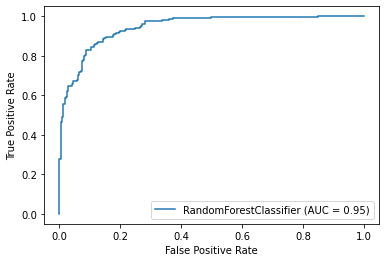

In [133]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(Final_RFC,x_test,y_test)

his curve helps us to choose the best model amongst the models for which we have plotted ROC curve.The best model is one which cover the maximum area under it.our Random Forest classifier ROC curve cover almost 95% area under it.

In [134]:
import joblib
joblib.dump(Final_RFC,"HR Aanlytics Project.pkl")

['HR Aanlytics Project.pkl']

here i saved model sucessfully